## Advanced topic - Antimony modules!

### A minimal example:

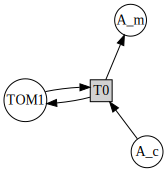

In [1]:
import tellurium as te;
#import tellurium as te; te.setDefaultPlottingEngine('matplotlib')
#import matplotlib.pyplot as plt
#%matplotlib inline

class Diagram(te.visualization.SBMLDiagram):
    def draw(self, layout='neato', file='graph.svg', **kwargs):
        """ Draw the graph.
        Optional layout=['neato'|'dot'|'twopi'|'circo'|'fdp'|'nop']
        will use specified graphviz layout method.
        :param layout: pygraphviz layout algorithm (default: 'neato')
        :type layout: str
        """
        self.g.write('test.dot')
        self.g.layout(prog=layout)
        self.g.draw(file)        
        from IPython.display import SVG
        return SVG(file)


r = te.loada('example.antimony')
diagram = Diagram(r.getSBML())
diagram.draw()

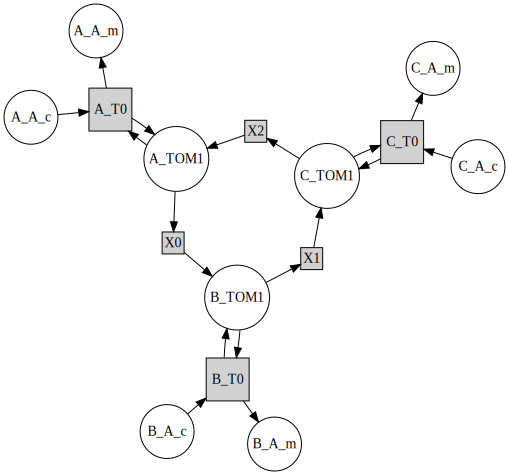

In [121]:
model_circle = '''
import "example.antimony"

model circle
    A: example()
    B: example()
    C: example()
    
    X0: A.TOM1 -> B.TOM1;
    X1: B.TOM1 -> C.TOM1;
    X2: C.TOM1 ->  A.TOM1;
end

'''

circle = te.loada(model_circle)
diagram = Diagram(circle.getSBML())
diagram.draw()

In [122]:
circle = te.loada(model_circle)
print(circle.getAntimony())

// Created by libAntimony v2.9.4
model *circle()

  // Compartments and Species:
  compartment A_cell, A_mitochondria, B_cell, B_mitochondria, C_cell, C_mitochondria;
  species A_TOM1 in A_cell, A_A_c in A_cell, A_A_m in A_mitochondria, B_TOM1 in B_cell;
  species B_A_c in B_cell, B_A_m in B_mitochondria, C_TOM1 in C_cell, C_A_c in C_cell;
  species C_A_m in C_mitochondria;

  // Assignment Rules:
  A_kineticLaw := A_k1*A_TOM1*(A_A_c - A_A_m)/A_I;
  B_kineticLaw := B_k1*B_TOM1*(B_A_c - B_A_m)/B_I;
  C_kineticLaw := C_k1*C_TOM1*(C_A_c - C_A_m)/C_I;

  // Reactions:
  A_T0: A_A_c + A_TOM1 -> 2 A_A_m + A_TOM1; A_kineticLaw;
  B_T0: B_A_c + B_TOM1 -> 2 B_A_m + B_TOM1; B_kineticLaw;
  C_T0: C_A_c + C_TOM1 -> 2 C_A_m + C_TOM1; C_kineticLaw;
  X0: A_TOM1 -> B_TOM1; ;
  X1: B_TOM1 -> C_TOM1; ;
  X2: C_TOM1 -> A_TOM1; ;

  // Species initializations:
  A_TOM1 = 10;
  A_A_c = 100;
  A_A_m = 1;
  B_TOM1 = 10;
  B_A_c = 100;
  B_A_m = 1;
  C_TOM1 = 10;
  C_A_c = 100;
  C_A_m = 1;

  // Compartment

// Created by libAntimony v2.9.4
model *reactions()

  // Compartments and Species:
  species Y_A, X_B, Y_B;

  // Reactions:
  X_R: Y_A -> X_B; 0.1;
  Y_R: Y_A -> Y_B; 0.1;

  // Species initializations:
  Y_A = ;
  X_B = ;
  Y_B = ;
end



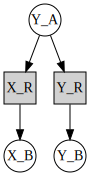

In [168]:
model_is = '''

model simple
    R: A -> B; 0.1;     
end

model reactions
    X: simple();
    Y: simple();
    
    X.A is Y.A;    
end    

'''

mapk = te.loada(model_is)
print(mapk.getAntimony())
diagram = Diagram(mapk.getSBML())

diagram.draw(layout='dot')

// Created by libAntimony v2.9.4
model *reactions()

  // Compartments and Species:
  species X_A, X_B, Y_A, Y_B;

  // Reactions:
  X_R: X_A -> X_B; 0.1;
  Y_R: Y_A -> Y_B; 0.1;
  _J0: X_A -> Y_A; ;

  // Species initializations:
  X_A = ;
  X_B = ;
  Y_A = ;
  Y_B = ;
end



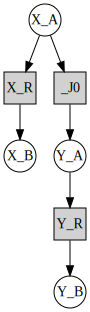

In [176]:
model_is = '''

model simple
    R: A -> B; 0.1;     
end

model reactions
    X: simple();
    Y: simple();
    
    X.A -> Y.A; ;    
end    

'''

mapk = te.loada(model_is)
print(mapk.getAntimony())
diagram = Diagram(mapk.getSBML())

diagram.draw(layout='dot')

## Arrays of model instances?

In [172]:
multi_comp = '''

model cell
#some stuff
end

model mitochondria
#some stuff
end

model nucleus
#some stuff
end

c0: cell();
n0: nucleus();
m0: mitchondria();
m1: mitchondria();
m2: mitchondria();
m3: mitchondria();
m4: mitchondria();
m5: mitchondria();

m1, m2, m3, m4, m5 in c0.cytosol;
nucleus in c0.cytosol;

'''

Consider an antimony model 'multi_comp' within Python you could do this:

In [174]:
for i in range(6):
    multi_comp = multi_comp + "m%s: mitchondria();\n" % (i)

In [175]:
print(multi_comp)



model cell
#some stuff
end

model mitochondria
#some stuff
end

model nucleus
#some stuff
end

c0: cell();
n0: nucleus();
m0: mitchondria();
m1: mitchondria();
m2: mitchondria();
m3: mitchondria();
m4: mitchondria();
m5: mitchondria();

m1, m2, m3, m4, m5 in c0.cytosol;
nucleus in c0.cytosol;

m0: mitchondria();
m1: mitchondria();
m2: mitchondria();
m3: mitchondria();
m4: mitchondria();
m5: mitchondria();



## Deletions: delete species in submodels

In [125]:
model_circle = '''
import "example.antimony"

model circle
    A: example()
    B: example()
    C: example()
    
    X0: A.TOM1 -> B.TOM1;
    X1: B.TOM1 -> C.TOM1;
    X2: C.TOM1 ->  A.TOM1;
    
    delete C.A_m
    C.kineticLaw := 0.1;
    
end

'''

circle = te.loada(model_circle)
print(circle.getAntimony())

// Created by libAntimony v2.9.4
model *circle()

  // Compartments and Species:
  compartment A_cell, A_mitochondria, B_cell, B_mitochondria, C_cell, C_mitochondria;
  species A_TOM1 in A_cell, A_A_c in A_cell, A_A_m in A_mitochondria, B_TOM1 in B_cell;
  species B_A_c in B_cell, B_A_m in B_mitochondria, C_TOM1 in C_cell, C_A_c in C_cell;

  // Assignment Rules:
  A_kineticLaw := A_k1*A_TOM1*(A_A_c - A_A_m)/A_I;
  B_kineticLaw := B_k1*B_TOM1*(B_A_c - B_A_m)/B_I;
  C_kineticLaw := 0.1;

  // Reactions:
  A_T0: A_A_c + A_TOM1 -> 2 A_A_m + A_TOM1; A_kineticLaw;
  B_T0: B_A_c + B_TOM1 -> 2 B_A_m + B_TOM1; B_kineticLaw;
  C_T0: C_A_c + C_TOM1 -> C_TOM1; ;
  X0: A_TOM1 -> B_TOM1; ;
  X1: B_TOM1 -> C_TOM1; ;
  X2: C_TOM1 -> A_TOM1; ;

  // Species initializations:
  A_TOM1 = 10;
  A_A_c = 100;
  A_A_m = 1;
  B_TOM1 = 10;
  B_A_c = 100;
  B_A_m = 1;
  C_TOM1 = 10;
  C_A_c = 100;

  // Compartment initializations:
  A_cell = 100;
  A_mitochondria = 10;
  B_cell = 100;
  B_mitochondria = 10;
  

### Usually, deletion of a species is overkill. 
### Instead, overwrite assignments or kinetics!

In [126]:
model_circle = '''
import "example.antimony"

model circle
    A: example()
    B: example()
    C: example()
    
    X0: A.TOM1 -> B.TOM1;
    X1: B.TOM1 -> C.TOM1;
    X2: C.TOM1 ->  A.TOM1;
        
    # Assignment rule-> ODE:
    C.kineticLaw := ;
    C.kineticLaw '= 0.1;
    C.kineticLaw = 0.1;
    
    # Delete reaction:
    #delete A.T0
    
    # Overwrite reaction
    A_TO: A.A_c -> A.A_m; 0.1; # Note, the Underline, Submodels are flattened in sbml!
end

'''

circle = te.loada(model_circle)
print(circle.getAntimony())

// Created by libAntimony v2.9.4
model *circle()

  // Compartments and Species:
  compartment A_cell, A_mitochondria, B_cell, B_mitochondria, C_cell, C_mitochondria;
  species A_TOM1 in A_cell, A_A_c in A_cell, A_A_m in A_mitochondria, B_TOM1 in B_cell;
  species B_A_c in B_cell, B_A_m in B_mitochondria, C_TOM1 in C_cell, C_A_c in C_cell;
  species C_A_m in C_mitochondria;

  // Assignment Rules:
  A_kineticLaw := A_k1*A_TOM1*(A_A_c - A_A_m)/A_I;
  B_kineticLaw := B_k1*B_TOM1*(B_A_c - B_A_m)/B_I;

  // Rate Rules:
  C_kineticLaw' = 0.1;

  // Reactions:
  A_T0: A_A_c + A_TOM1 -> 2 A_A_m + A_TOM1; A_kineticLaw;
  B_T0: B_A_c + B_TOM1 -> 2 B_A_m + B_TOM1; B_kineticLaw;
  C_T0: C_A_c + C_TOM1 -> 2 C_A_m + C_TOM1; C_kineticLaw;
  X0: A_TOM1 -> B_TOM1; ;
  X1: B_TOM1 -> C_TOM1; ;
  X2: C_TOM1 -> A_TOM1; ;
  A_TO: A_A_c -> A_A_m; 0.1;

  // Species initializations:
  A_TOM1 = 10;
  A_A_c = 100;
  A_A_m = 1;
  B_TOM1 = 10;
  B_A_c = 100;
  B_A_m = 1;
  C_TOM1 = 10;
  C_A_c = 100;
  C_A_m = 1